In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('./PhiUSIIL_Phishing_URL_Dataset.csv')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [3]:
df = df.select_dtypes(include='number')

In [4]:
df.shape

(235795, 51)

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

print("Training dimesion: " + str(x_train.shape) + " "  + str(y_train.shape))
print("Test: " + str(x_test.shape) + " "  + str(y_test.shape))

Training dimesion: (188636, 50) (188636,)
Test: (47159, 50) (47159,)


In [6]:
x_train

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
152469,28,21,0,100.000000,1.000000,0.038420,0.063423,3,1,0,...,0,0,0,1,138,9,13,371,1,26
199426,30,23,0,68.531856,1.000000,0.522907,0.069658,3,1,0,...,0,0,0,0,0,0,0,0,0,0
74577,31,23,0,43.100189,0.473684,0.001502,0.053005,3,1,0,...,0,0,0,0,0,2,4,1,0,3
8395,36,29,0,100.000000,1.000000,0.522907,0.057885,3,1,0,...,0,0,0,1,16,3,5,1,0,10
137020,25,18,0,100.000000,1.000000,0.522907,0.064608,3,1,0,...,0,0,0,1,49,2,7,96,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120166,167,15,0,9.540762,0.636364,0.522907,0.041233,3,1,0,...,0,0,0,1,1,1,2,2,0,2
24932,30,23,0,100.000000,1.000000,0.522907,0.064026,3,1,0,...,0,0,0,1,4,2,9,62,0,7
162752,23,16,0,100.000000,1.000000,0.522907,0.059634,3,1,0,...,1,1,0,1,13,11,37,53,0,19
226092,23,16,0,100.000000,0.777778,0.004559,0.043005,2,2,0,...,0,1,0,0,76,4,14,474,0,97


In [7]:
# Merge back into one dataframe for EDA
df = pd.DataFrame(x_train)
df.insert(0, "label", y_train)
df.head()

,label,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
152469,1,28,21,0,100.000000,1.000000,0.038420,0.063423,3,1,...,0,0,0,1,138,9,13,371,1,26
199426,0,30,23,0,68.531856,1.000000,0.522907,0.069658,3,1,...,0,0,0,0,0,0,0,0,0,0
74577,0,31,23,0,43.100189,0.473684,0.001502,0.053005,3,1,...,0,0,0,0,0,2,4,1,0,3
8395,1,36,29,0,100.000000,1.000000,0.522907,0.057885,3,1,...,0,0,0,1,16,3,5,1,0,10
137020,1,25,18,0,100.000000,1.000000,0.522907,0.064608,3,1,...,0,0,0,1,49,2,7,96,0,16


In [8]:
df.dtypes

label                           int64
URLLength                       int64
DomainLength                    int64
IsDomainIP                      int64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineLength               int64
HasTitle                        int64
DomainTitleM

<Axes: xlabel='label', ylabel='percent'>

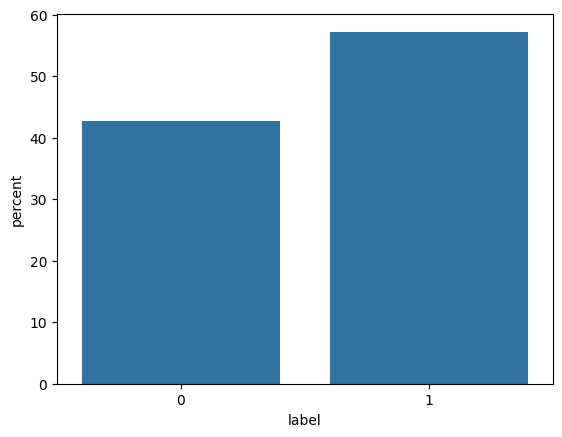

In [9]:
sns.countplot(data=df, x='label', stat='percent')

In [10]:
df.corr().loc['label'].sort_values()

SpacialCharRatioInURL        -0.534974
DegitRatioInURL              -0.433222
NoOfOtherSpecialCharsInURL   -0.390936
LetterRatioInURL             -0.367039
DomainLength                 -0.281895
NoOfLettersInURL             -0.252799
URLLength                    -0.239818
NoOfDegitsInURL              -0.205381
NoOfQMarkInURL               -0.175419
NoOfEqualsInURL              -0.090129
TLDLength                    -0.078815
NoOfSelfRedirect             -0.074821
IsDomainIP                   -0.060702
HasObfuscation               -0.052772
NoOfURLRedirect              -0.048015
ObfuscationRatio             -0.042089
LargestLineLength            -0.041102
NoOfAmpersandInURL           -0.038494
NoOfObfuscatedChar           -0.018016
NoOfSubDomain                -0.006271
NoOfPopup                     0.048521
NoOfCSS                       0.061445
TLDLegitimateProb             0.097636
Crypto                        0.099768
NoOfEmptyRef                  0.104121
HasPasswordField         

<Axes: ylabel='URLSimilarityIndex'>

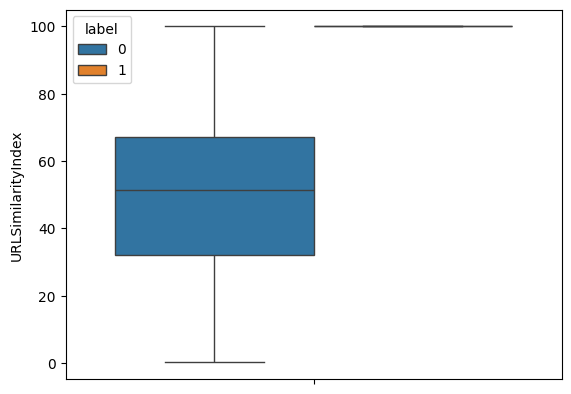

In [11]:
sns.boxplot(data=df, y='URLSimilarityIndex', hue='label')

<Axes: xlabel='HasSocialNet', ylabel='HasHiddenFields'>

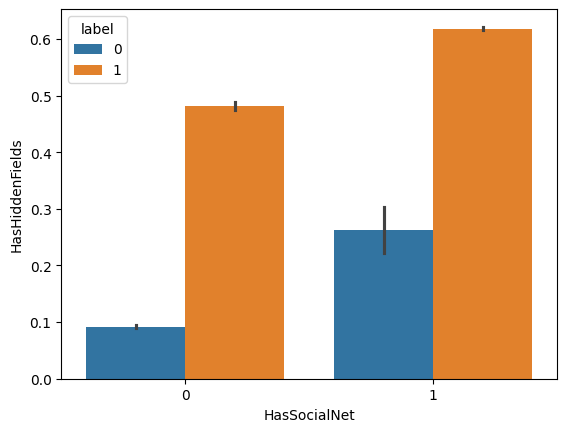

In [12]:
sns.barplot(data=df, x='HasSocialNet', y='HasHiddenFields', hue='label')

<Axes: xlabel='DomainLength', ylabel='percent'>

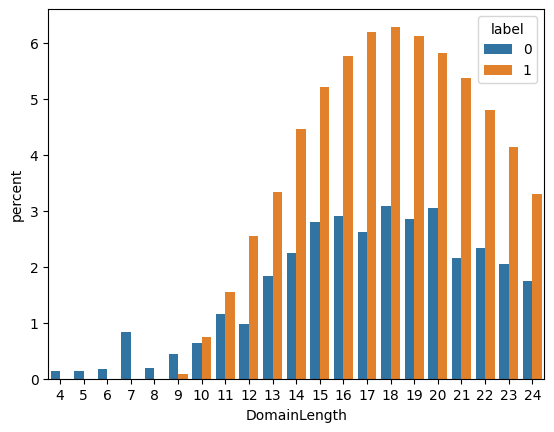

In [39]:
sns.countplot(data=df[df['DomainLength'] <= 24.0], x='DomainLength', hue='label', stat='percent')

<Axes: xlabel='NoOfOtherSpecialCharsInURL', ylabel='count'>

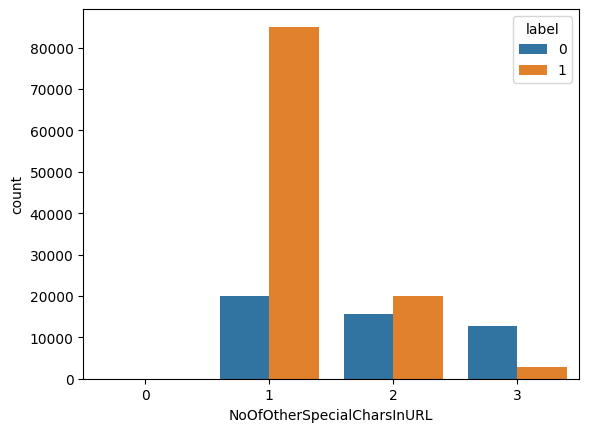

In [40]:
sns.countplot(data=df[df['NoOfOtherSpecialCharsInURL'] <= 3.0], x='NoOfOtherSpecialCharsInURL', hue='label')

A general trend that we can see is that Phising website try really hard to not look suspicous. It will try to use as little special characters as possible, staying as close to the orginal website as possible. 

Generally, longer URL tend to be phishing. So, if a website URL is unusually long, it's likely that it's a scam website.

<Axes: xlabel='HasCopyrightInfo', ylabel='percent'>

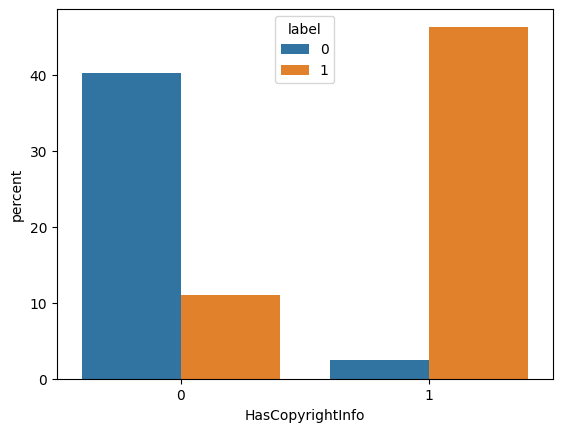

In [41]:
sns.countplot(data=df, x='HasCopyrightInfo', stat='percent', hue='label')

In [14]:
lr = LogisticRegression(solver='newton-cholesky')

t0 = time.time()
lr.fit(x_train, y_train)
t1 = time.time()

In [15]:
print(f"Training takes {t1-t0}s")

Training takes 0.9155805110931396s


In [16]:
accuracy_score(y_train, lr.predict(x_train))

0.999978795139846

In [17]:
XGB_clf = XGBClassifier(n_estimators=50, learning_rate=0.01,
                        objective='binary:logistic')

In [18]:
XGB_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
accuracy_score(y_train, XGB_clf.predict(x_train))

0.999989397569923